In [47]:
# Let's load in some packages

% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import statsmodels.api as sm

# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
data=datasets.load_boston()

# Take a look at the data again
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

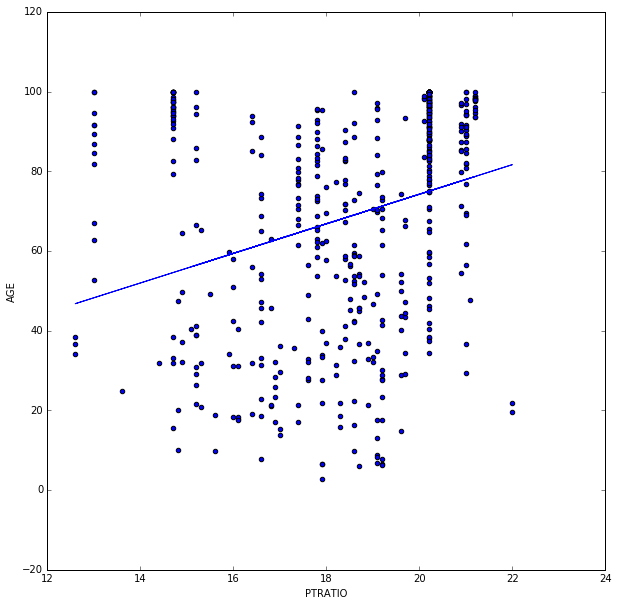

In [7]:

# Fit a line

X = df[["PTRATIO"]]
y = df["AGE"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# PREDICTICTION  is y hat
# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("AGE")
plt.xlabel("PTRATIO")

In [6]:
predictions

array([ 56.78455838,  66.06308099,  66.06308099,  69.40334913,
        69.40334913,  69.40334913,  56.41341748,  56.41341748,
        56.41341748,  56.41341748,  56.41341748,  56.41341748,
        56.41341748,  77.93958993,  77.93958993,  77.93958993,
        77.93958993,  77.93958993,  77.93958993,  77.93958993,
        77.93958993,  77.93958993,  77.93958993,  77.93958993,
        77.93958993,  77.93958993,  77.93958993,  77.93958993,
        77.93958993,  77.93958993,  77.93958993,  77.93958993,
        77.93958993,  77.93958993,  77.93958993,  71.25905365,
        71.25905365,  71.25905365,  71.25905365,  67.91878551,
        67.91878551,  66.4342219 ,  66.4342219 ,  66.4342219 ,
        66.4342219 ,  66.4342219 ,  66.4342219 ,  66.4342219 ,
        66.4342219 ,  66.4342219 ,  62.35167195,  62.35167195,
        62.35167195,  62.35167195,  78.31073084,  66.4342219 ,
        64.20737647,  56.04227657,  73.11475818,  73.11475818,
        73.11475818,  73.11475818,  73.11475818,  73.11

In [8]:
# Statsmodels makes it easy to get the score
print "r^2:", model.rsquared

r^2: 0.865805992741


In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3258.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):          2.16e-222
Time:                        12:06:48   Log-Likelihood:                -2388.5
No. Observations:                 506   AIC:                             4779.
Df Residuals:                     505   BIC:                             4783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
PTRATIO        3.7114      0.065     57.081      0.000         3.584     3.839
==============================================================================
Omnibus:                       41.172   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.213
Skew:                          -0.478   Prob(JB):                     4.53e-07
Kurtosis:                       2.312   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df['PTRATIO'].value_counts()

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
19.1     17
18.6     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
17.9     11
20.9     11
18.7      9
19.7      8
19.6      8
17.6      7
16.4      6
18.0      5
16.0      5
16.1      5
16.9      5
20.1      5
19.0      4
17.0      4
18.5      4
18.2      4
14.9      4
16.8      4
18.3      4
18.9      3
15.3      3
12.6      3
14.8      3
15.6      2
22.0      2
15.9      2
18.8      2
15.5      1
21.1      1
15.1      1
14.4      1
13.6      1
17.3      1
Name: PTRATIO, dtype: int64

r^2: 0.785965012027
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.171679657896
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.155558526185
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.755583653556
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.0612902049163
r^2: 0.061

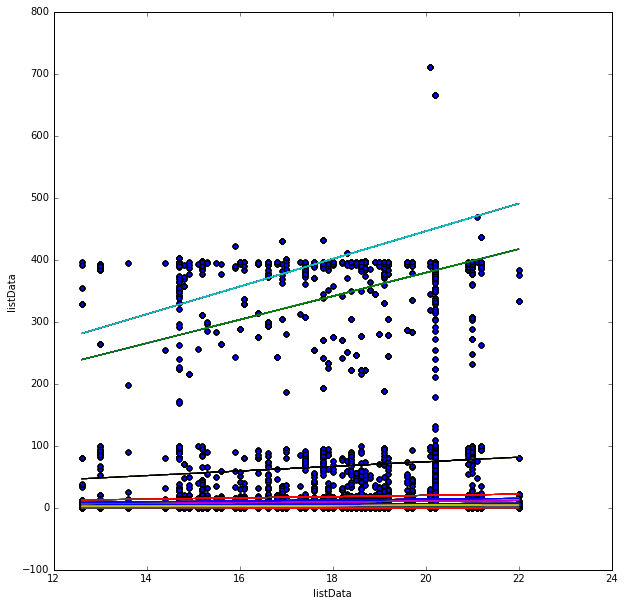

In [29]:


listData = {}
for first_pair in df.columns:
    for second_pair in df.columns:
        if first_pair != second_pair:
            y=df[first_pair]
            x=df[second_pair]
            model = sm.OLS(y, X).fit()
            predictions = model.predict(X)

        print "r^2:", model.rsquared
        plt.scatter(X, y)
# ## The line / model
        plt.plot(X, predictions)
        plt.ylabel("listData")
        plt.xlabel("listData")
                                        
                               
                                        
                                        

# for i in range(0, len(l)):
#    for j in range(0, len(l)):
#      listData.append[i][j]
# #        if i > j:
# #             listData.append(str(l[j])+" + "+str(l[i]))
# for i in range(0, len(l2)):
#     X = df[["l2"]]
#     y = df["l2"]

#     model = sm.OLS(y, X).fit()
#     predictions = model.predict(X)

# # PREDICTICTION  is y hat
# # Plot the data and the best fit line
# ## The data

  

In [ ]:
#  y, x = patsy.dmatrices("MEDV ~ "+l2[i], data=df)
#    model = sm.OLS(y, x).fit()
#    predictions = model.predict(x)
#    model.summary()
#    plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
#    plt.xlabel("Predicted Values from " + l2[i])
#    plt.ylabel("Actual Values MEDV")
#    plt.show()
#    print "MSE:", model.mse_model

In [38]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

KeyError: 'MEDV'

In [36]:
import patsy

In [39]:
y,x = patsy.dmatrices('CRIM ~ RM + LSTAT', data = df)

In [40]:

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     66.79
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.89e-26
Time:                        12:40:56   Log-Likelihood:                -1746.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     503   BIC:                             3512.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -11.2705      4.385     -2.570      0.010       -19.886    -2.655
RM             1.1315      0.614      1.842      0.066        -0.075     2.338
LSTAT          0.6127      0.060     10.138      0.000         0.494     0.731
==============================================================================
Omnibus:                      599.043   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48418.564
Skew:                           5.620   Prob(JB):                         0.00
Kurtosis:                      49.586   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
print "r^2:", model.rsquared

r^2: 0.209833386087


In [48]:
targets=pd.DataFrame(data.target, columns=['MEDV'])

In [49]:
print data.target[0]

24.0


In [53]:
data['MEDV']= targets['MEDV']

In [55]:
y,x =patsy.dmatrices('MEDV ~ RM + LSTAT', data = df)

NameError: name 'MEDV' is not defined